Alunos:Bárbara Fernandes Madera 11915032, Gabriela Passos de Andrade 12625142 , Rafael Learth 13676367

## Parte 1

# Exo. A.

**A)** e **C)**Exemplo de teste para a implementação: f(x) = x^2 - 4 com derivada analítica.

In [ ]:
def newton_method(func, x0, tol, max_iter, derivate=None, h=None):

  if derivate is None and h is None:
    raise ValueError("É necessário fornecer a deriva ou o valor de h.")

  x = x0
  iter_count = 0

  while iter_count < max_iter:
    if derivate is not None:
      f_prime = derivate(x)
    else:
      f_prime = (func(x + h) - func) / h

    if abs(f_prime) < tol:
      break

    x = x - func(x) / f_prime
    iter_count += 1

  return x


#Questão c:
def func(x):
  return x**2 - 4

def derivate(x):
  return 2 * x

x0 = 1.5
tolerance = 1e-6
max_iterations = 100


zero = newton_method(func, x0, tolerance, max_iterations, derivate=derivate)
print("Zero encontrado:", zero)


Zero encontrado: 2.0


**B)**

In [ ]:
def pedro(x):
    return x**3 - 30.0*x**2 + 2552.0

def derpedro(x):
    return 3.0*x**2 - 60.0*x
def Newton(func, derfunc, x0, tol, max_iter):

    n = 0
    error = np.inf
    xold = x0
    lst_erros = []
    lst_iter = []
    while(error > tol and n < max_iter):

        xnew = xold - func(xold) / derfunc(xold)

        error = np.abs(xnew - xold)
        lst_erros.append(error)
        lst_iter.append(n)

        print('iter= ', n, 'erro= ', error, 'func(x)= ', func(xnew))

        xold = xnew

        n += 1

    return xnew
def derivadafun(fun,x,h):
    return (fun(x+h)-fun(x))/h
def opcao_1(func, derfunc, x0, tol, max_iter):
    return Newton(func, derfunc, x0, tol, max_iter)
def opcao_2(func,x0,tol,max_iter,h):
    n = 0
    error = np.inf
    xold = x0
    lst_erros = []
    lst_iter = []
    while(error > tol and n < max_iter):
        xnew = xold - func(xold) / derivadafun(func,xold,h)

        error = np.abs(xnew - xold)
        lst_erros.append(error)
        lst_iter.append(n)

        print('iter= ', n, 'erro= ', error, 'func(x)= ', func(xnew))

        xold = xnew

        n += 1

    return xnew

x0 = 3
tol = 1.0e-12
max_iter = 100

print("Selecione uma opção:")
print("1. Opção 1")
print("2. Opção 2")

opcao = input("Digite o número da opção desejada: ")

if opcao == '1':
    sol=opcao_1(pedro, derpedro, x0, tol, max_iter)
    print(sol)
elif opcao == '2':
    for h in [1e-3,1e-4,1e-5]:
        sol=opcao_2(pedro,x0,tol,max_iter,h)
        print("h=",h,"sol=",sol)

Selecione uma opção:
1. Opção 1
2. Opção 2
Digite o número da opção desejada: 3


Comparação dos resultados com função fsolve de python.

In [ ]:
from scipy.optimize import fsolve

x = 1.5

zero_fsolve = fsolve(func, x0, fprime=derivate)
print("Zero encontrado com fsolve:", zero_fsolve)

Zero encontrado com fsolve: [2.]


# Exo B

Valor de x para potência dissipada igual a 6 (Caso 1): 5.0
Valor de x para potência dissipada igual a 6 (Caso 2): 5.0


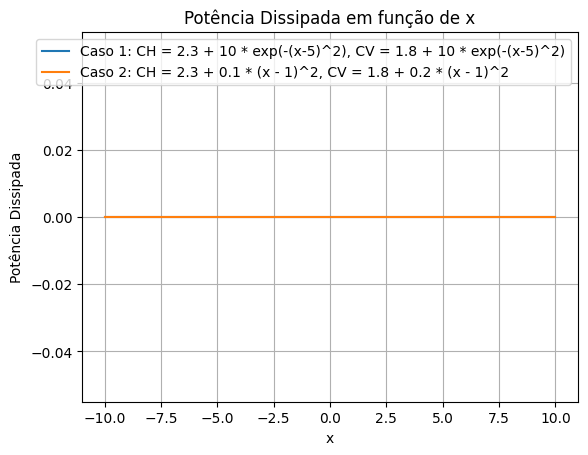

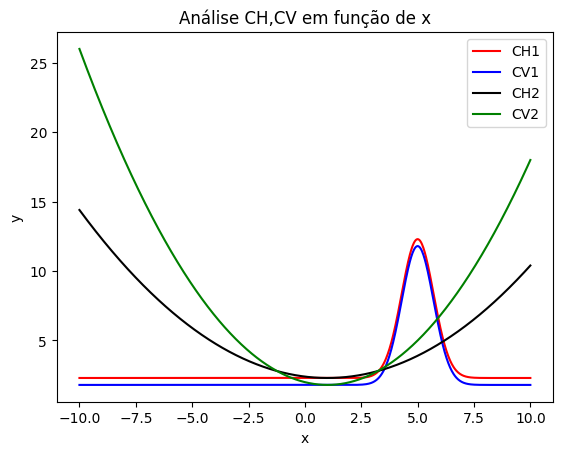

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.optimize import fsolve

def GeraRede(n, m):
    conec = np.zeros((n * m, 2), dtype=int)
    conec[:, 0] = np.arange(n * m)
    conec[:, 1] = conec[:, 0] + 1
    conec[-1, 1] = 0
    return conec

def CH_func1(x):
    return 2.3 + 10 * np.exp(-(x - 5)**2)

def CV_func1(x):
    return 1.8 + 10 * np.exp(-(x - 5)**2)

def CH_func2(x):
    return 2.3 + 0.1 * (x - 1)**2

def CV_func2(x):
    return 1.8 + 0.2 * (x - 1)**2

def ResolveRede(conec, QB, nB, natm, x, CH_func, CV_func):
    C = np.zeros(conec.shape[0])
    CH = CH_func(x)
    CV = CV_func(x)
    C[:natm] = CH
    C[natm:] = CV
    return C

def PotenciaDissipada(Q, C):
    return np.sum(np.abs(Q) ** 3 * C)

def ResolveVazao(conec, C, QB, nB):
    Q = np.zeros(conec.shape[0])
    for i in range(conec.shape[0]):
        if conec[i, 0] < nB:
            Q[i] = QB
        else:
            Q[i] = (C[conec[i, 0]] - C[conec[i, 1]])
    return Q

def EquacaoPotencia(x, CH_func, CV_func):
    C = ResolveRede(conec, 3, 0, 8 * 9, x, CH_func, CV_func)
    Q = ResolveVazao(conec, C, 3, 0)
    potencia = PotenciaDissipada(Q, C)
    return potencia - 6

conec = GeraRede(8, 9)

sol1 = root(EquacaoPotencia, x0=5, args=(CH_func1, CV_func1))
x_solution1 = sol1.x[0]
print("Valor de x para potência dissipada igual a 6 (Caso 1):", x_solution1)

sol2 = root(EquacaoPotencia, x0=5, args=(CH_func2, CV_func2))
x_solution2 = sol2.x[0]
print("Valor de x para potência dissipada igual a 6 (Caso 2):", x_solution2)

x_values = np.linspace(-10, 10, 60)
potencia_values1 = np.zeros(60)
potencia_values2 = np.zeros(60)

for i, x in enumerate(x_values):
    C1 = ResolveRede(conec, 3, 0, 8 * 9, x, CH_func1, CV_func1)
    C2 = ResolveRede(conec, 3, 0, 8 * 9, x, CH_func2, CV_func2)

    Q1 = ResolveVazao(conec, C1, 3, 0)
    potencia_values1[i] = PotenciaDissipada(Q1, C1)

    Q2 = ResolveVazao(conec, C2, 3, 0)
    potencia_values2[i] = PotenciaDissipada(Q2, C2)

plt.plot(x_values, potencia_values1, label='Caso 1: CH = 2.3 + 10 * exp(-(x-5)^2), CV = 1.8 + 10 * exp(-(x-5)^2)')
plt.plot(x_values, potencia_values2, label='Caso 2: CH = 2.3 + 0.1 * (x - 1)^2, CV = 1.8 + 0.2 * (x - 1)^2')

plt.xlabel('x')
plt.ylabel('Potência Dissipada')
plt.title('Potência Dissipada em função de x')
plt.grid(True)
plt.legend()
plt.show()
n=8
m=9
QB=3
natm=n*m
nB=0

fCH1=[]
fCV1=[]

fCH2=[]
fCV2=[]

x0=-10
xf=10

N=1000
t= np.linspace(x0, xf, N, endpoint=True)

for x in t:
    fCH1.append(CH_func1(x))
    fCV1.append(CV_func1(x))
    fCH2.append(CH_func2(x))
    fCV2.append(CV_func2(x))




plt.plot(t,fCH1,'-r',label="CH1")
plt.plot(t,fCV1,'-b',label="CV1")
plt.plot(t,fCH2,'-k',label="CH2")
plt.plot(t,fCV2,'-g',label="CV2")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Análise CH,CV em função de x')
plt.legend()
plt.show()



**Parte 2: Sistema sobredeterminados**

Questão 4

0   10.081924466717858
1   19.443358952068326
2   2.8211951320218356
3   5.440777681563587
4   0.7894466973263045
5   1.522476741450723
6   0.22090853654378395
7   0.4260301677299455
8   0.06181618300918049
9   0.11921476294150402
10   0.017297839828240097
11   0.033359514841299204
12   0.004840403405022431
13   0.009334894462592077
14   0.0013544757817162871
15   0.002612155933370866
16   0.0003790189556013449
17   0.0007309518760069933
18   0.0001060597543757078
19   0.00020454010358470073
20   2.967838768018619e-05
21   5.723585281461985e-05
22   8.304815531349743e-06
23   1.6016139555795428e-05
24   2.3239119888257662e-06
25   4.481749014058893e-06
26   6.50293425639763e-07
27   1.254114618985676e-06
28   1.8196968344727574e-07
29   3.5093510309249755e-07
30   5.092004117164537e-08
31   9.820128694479202e-08
32   1.4248799121322572e-08
33   2.7479249814352485e-08
34   3.98719564107601e-09
Solução do método de gradiente: [-4.99885643 29.99823044]
Equações normais xeqn = [-4.99885643

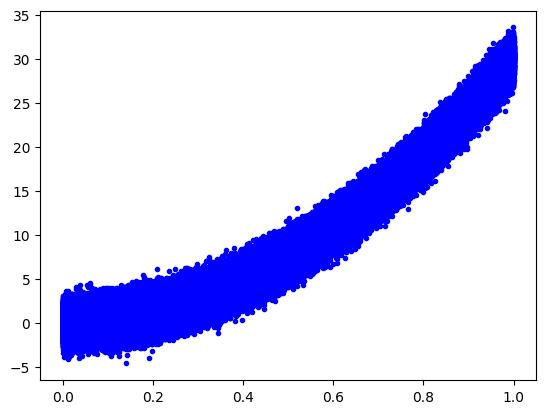

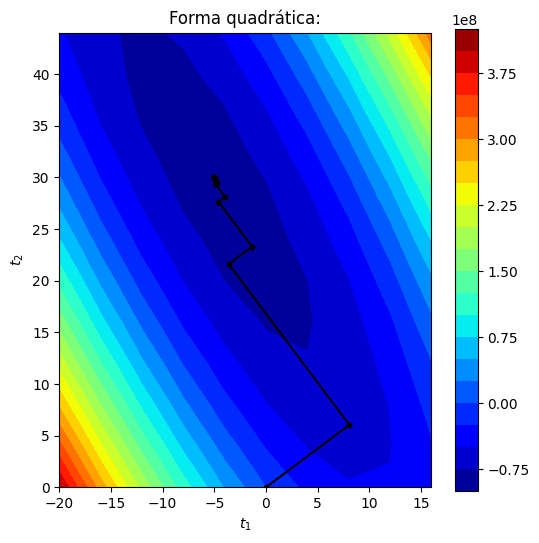

0   10.034669965619258
1   18.375255628294006
2   2.932380403013488
3   4.448670148605457
4   1.003052480708429
5   3.3584353726250473
6   0.2936285086163216
7   0.08184641161439107
8   0.2997476902195477
9   0.08334859594186639
10   0.06652155630490633
11   0.08527324946205542
12   0.07047004378441804
13   0.06622669956726356
14   0.018145255954281833
15   0.08238199575490911
16   0.032764625471284566
17   0.026115154465572922
18   0.0650647651769336
19   0.06535204340342893
20   0.019895721692462422
21   0.014821078214403136
22   0.014768505194239707
23   0.022986174349943066
24   0.03098878687731253
25   0.018253892590669025
26   0.029448905049448984
27   0.016938063300771723
28   0.01497721049901087
29   0.027834078088929414
30   0.032885215073339046
31   0.011029169301050603
32   0.01986682087748577
33   0.02476217547036222
34   0.028602330974484894
35   0.03594301339948423
36   0.028234827034262312
37   0.03976184526947001
38   0.027582313828850402
39   0.016078633171933587
40   

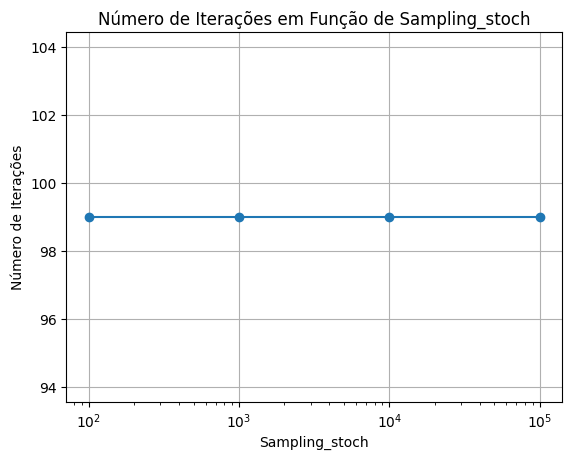

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definição do problema
n = 2
m = 1000000

np.random.seed(seed=123456)

# Gera alguns dados artificiais
A = np.zeros(shape=(m,n))
A[:,0] = 1.0
A[:,1] = np.random.rand(m)
b = 30*A[:,1]**2 + np.random.randn(m)
plt.plot(A[:,1],b,'.b')

# Construir matriz e lado direito (equações normais)
M = np.dot(A.T,A)
c = np.dot(A.T,b)

# Exemplo de plotagem em R2
if(True):
    tx = np.arange(-20.0, 20.0, 4.0)
    ty = np.arange(0.0, 45.0, 4.0)
    xp,yp = np.meshgrid(tx,ty)
    zp = 0.5*(M[0,0]*xp**2 + 2.0*M[0,1]*xp*yp +  M[1,1]*yp**2) - (c[0]*xp + c[1]*yp)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_aspect('equal')
    ax.set(xlabel='$t_1$', ylabel='$t_2$', title='Forma quadrática:')
    im = ax.contourf(xp, yp, zp, 20, cmap='jet')
    fig.colorbar(im, ax=ax)

# Método de minimização
MAXIT = 100
TOLr = 1.0E-8
x = np.zeros(2)
xold = np.zeros(2)
x1pl = np.zeros(2)
x2pl = np.zeros(2)
beta = 1
normr = []
sampling_stoch = 1
mstoch = int(m / sampling_stoch)  # if mstoch == m => determinístico
arr = np.arange(m)
error = 10 * TOLr

for iter in range(MAXIT):
    if sampling_stoch != 1:
        # Valores nstoch de amostra
        kper = np.random.permutation(arr)[:mstoch]
        Asam = A[kper, :]
        bsam = b[kper]
        M = np.dot(Asam.T, Asam)
        c = np.dot(Asam.T, bsam)

    r = M @ x - c
    d = -r
    beta = d.T @ d / (d.T @ M @ d)

    xold[:] = x[:]
    x += beta * d

    if True:
        x1pl[0] = xold[0]
        x1pl[1] = x[0]
        x2pl[0] = xold[1]
        x2pl[1] = x[1]
        plt.plot(x1pl, x2pl, '.-k')

    error = np.linalg.norm(x - xold)
    normr.append(error)
    print(iter, ' ', error)
    if error < TOLr:
        break

print('Solução do método de gradiente:', x)

# Solução usando equações normais
xeqn = np.linalg.solve(M, c)
print('Equações normais xeqn =', xeqn)

# ou, usando fatoração QR
x = np.linalg.lstsq(A, b, rcond=None)[0]
print('Scipy solução de mínimos quadrados (QR) =', x)

plt.show()

# Caso estocástico
sampling_stoch_values = [100, 1000, 10000, 100000]
num_iterations = []

for sampling_stoch in sampling_stoch_values:
    mstoch = int(m / sampling_stoch)
    arr = np.arange(m)
    x = np.zeros(2)
    normr = []
    error = 10 * TOLr

    for iter in range(MAXIT):
        if sampling_stoch != 1:
            kper = np.random.permutation(arr)[:mstoch]
            Asam = A[kper, :]
            bsam = b[kper]
            M = np.dot(Asam.T, Asam)
            c = np.dot(Asam.T, bsam)

        r = M @ x - c
        d = -r
        beta = d.T @ d / (d.T @ M @ d)

        xold[:] = x[:]
        x += beta * d

        error = np.linalg.norm(x - xold)
        normr.append(error)
        print(iter, ' ', error)
        if error < TOLr:
            break

    num_iterations.append(iter)

    print('Sampling_stoch =', sampling_stoch)
    print('Solução do método de gradiente:', x)

    xeqn = np.linalg.solve(M, c)
    print('Equações normais xeqn =', xeqn)

    x = np.linalg.lstsq(A, b, rcond=None)[0]
    print('Scipy solução de mínimos quadrados (QR) =', x)

    print()

# Gráfico do número de iterações em função de sampling_stoch
plt.plot(sampling_stoch_values, num_iterations, marker='o')
plt.xscale('log')
plt.xlabel("Sampling_stoch")
plt.ylabel("Número de Iterações")
plt.title("Número de Iterações em Função de Sampling_stoch")
plt.grid(True)
plt.show()


#Parte 3
  

In [ ]:
import numpy as np
from math import e
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


**A**)

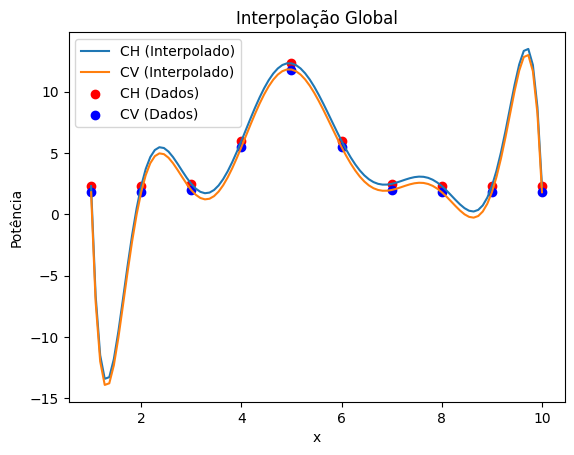

In [ ]:

npoints = 10
grau = npoints - 1
x = np.linspace(1, 10, num=10, endpoint=True).astype(int)
CH = 2.3 + 10*e**(-(x-5)**2)
CV = 1.8 + 10*e**(-(x-5)**2)

A = np.vander(x,grau+1, increasing=True)
cH = np.linalg.lstsq(A, CH, rcond=None)[0]
cV = np.linalg.lstsq(A, CV, rcond=None)[0]

x_eval = np.linspace(1, 10, num=100, endpoint=True)
A_eval = np.vander(x_eval, grau+1, increasing=True)
CH_eval = np.dot(A_eval, cH)
CV_eval = np.dot(A_eval, cV)
plt.title('Interpolação Global')

plt.plot(x_eval, CH_eval, label='CH (Interpolado)')
plt.plot(x_eval, CV_eval, label='CV (Interpolado)')
plt.scatter(x, CH, color='red', label='CH (Dados)')
plt.scatter(x, CV, color='blue', label='CV (Dados)')
plt.xlabel('x')
plt.ylabel('Potência')
plt.legend()
plt.show()

**B)**

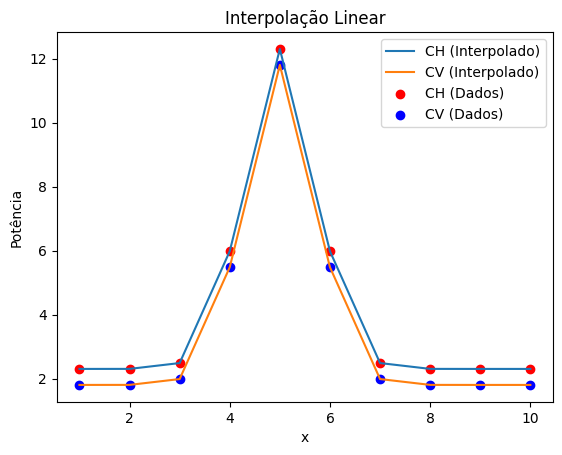

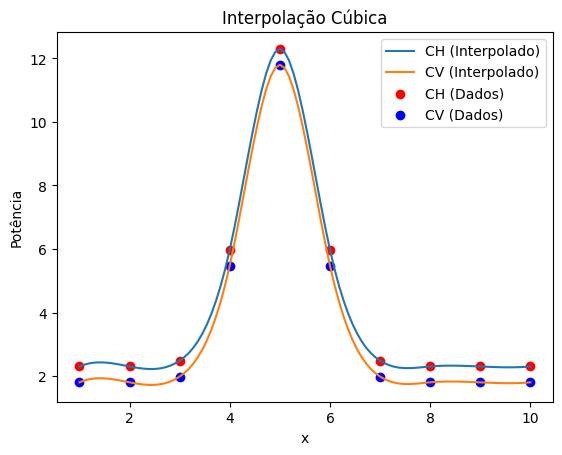

In [ ]:
npoints = 10
x = np.linspace(1, 10, num=npoints, endpoint=True)
CH = 2.3 + 10 * e**(-(x-5)**2)
CV = 1.8 + 10 * e**(-(x-5)**2)

interp_linear_CH = interp1d(x, CH, kind='linear')
interp_linear_CV = interp1d(x, CV, kind='linear')

x_eval = np.linspace(1, 10, num=100, endpoint=True)
CH_eval = interp_linear_CH(x_eval)
CV_eval = interp_linear_CV(x_eval)
plt.title('Interpolação Linear')
plt.plot(x_eval, CH_eval, label='CH (Interpolado)')
plt.plot(x_eval, CV_eval, label='CV (Interpolado)')
plt.scatter(x, CH, color='red', label='CH (Dados)')
plt.scatter(x, CV, color='blue', label='CV (Dados)')
plt.xlabel('x')
plt.ylabel('Potência')
plt.legend()
plt.show()
plt.title('Interpolação Cúbica')
interp_linear_CH = interp1d(x, CH, kind='cubic')
interp_linear_CV = interp1d(x, CV, kind='cubic')

x_eval = np.linspace(1, 10, num=100, endpoint=True)
CH_eval = interp_linear_CH(x_eval)
CV_eval = interp_linear_CV(x_eval)

plt.plot(x_eval, CH_eval, label='CH (Interpolado)')
plt.plot(x_eval, CV_eval, label='CV (Interpolado)')
plt.scatter(x, CH, color='red', label='CH (Dados)')
plt.scatter(x, CV, color='blue', label='CV (Dados)')
plt.xlabel('x')
plt.ylabel('Potência')
plt.legend()
plt.show()

**C)**


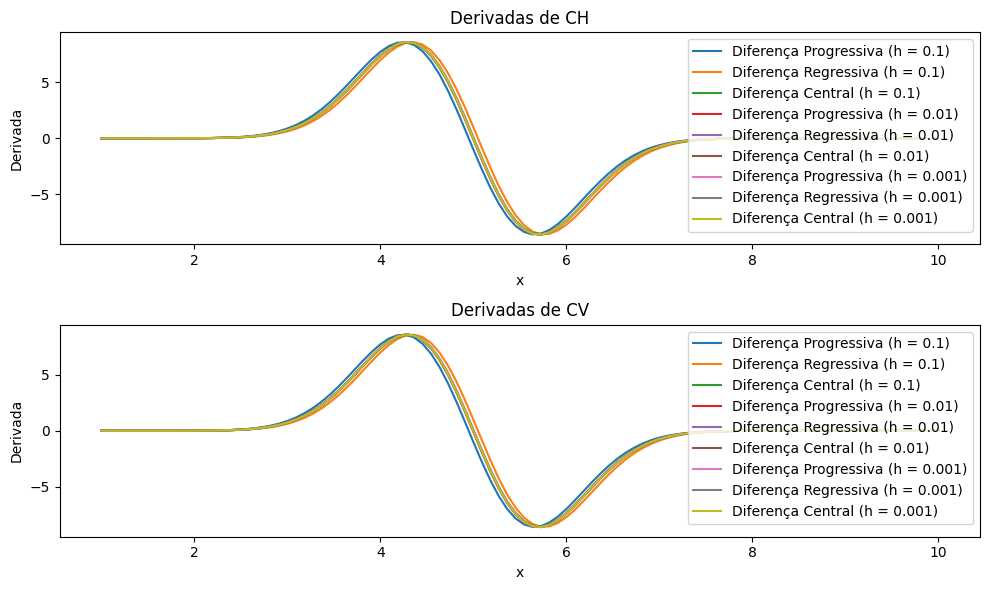

In [ ]:
# Funções CH e CV
def CH_function(x):
    return 2.3 + 10 * e**(-(x-5)**2)

def CV_function(x):
    return 1.8 + 10 * e**(-(x-5)**2)

# Intervalo de diferenciação
a = 1
b = 10

# Valores de h
h_values = [0.1, 0.01, 0.001]

# Pontos de avaliação
x_points = np.linspace(a, b, num=100)

# Diferença progressiva
def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

# Diferença regressiva
def backward_difference(f, x, h):
    return (f(x) - f(x - h)) / h

# Diferença central
def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

# Plotagem das derivadas para CH
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)  # Plotagem para CH

for h in h_values:
    CH_forward_diff = forward_difference(CH_function, x_points, h)
    CH_backward_diff = backward_difference(CH_function, x_points, h)
    CH_central_diff = central_difference(CH_function, x_points, h)

    plt.plot(x_points, CH_forward_diff, label=f'Diferença Progressiva (h = {h})')
    plt.plot(x_points, CH_backward_diff, label=f'Diferença Regressiva (h = {h})')
    plt.plot(x_points, CH_central_diff, label=f'Diferença Central (h = {h})')

plt.xlabel('x')
plt.ylabel('Derivada')
plt.title('Derivadas de CH')
plt.legend()

# Plotagem das derivadas para CV
plt.subplot(2, 1, 2)  # Plotagem para CV

for h in h_values:
    CV_forward_diff = forward_difference(CV_function, x_points, h)
    CV_backward_diff = backward_difference(CV_function, x_points, h)
    CV_central_diff = central_difference(CV_function, x_points, h)

    plt.plot(x_points, CV_forward_diff, label=f'Diferença Progressiva (h = {h})')
    plt.plot(x_points, CV_backward_diff, label=f'Diferença Regressiva (h = {h})')
    plt.plot(x_points, CV_central_diff, label=f'Diferença Central (h = {h})')

plt.xlabel('x')
plt.ylabel('Derivada')
plt.title('Derivadas de CV')
plt.legend()

plt.tight_layout()
plt.show()


#Parte 4

**A)**

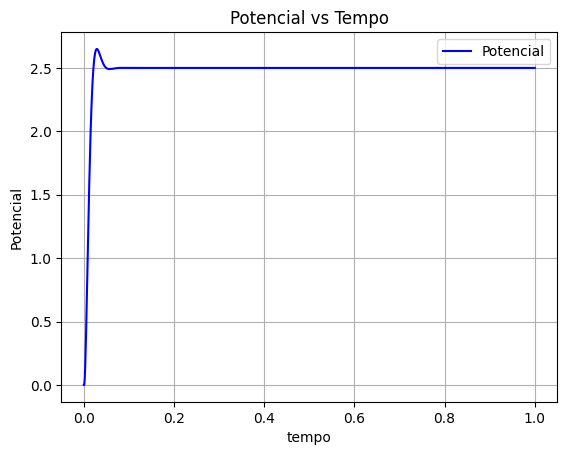

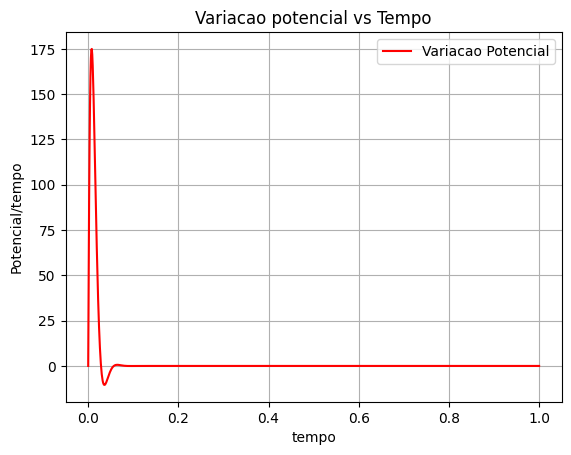

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def funccirc(y):
    yprime = np.array([y[1],5*1e4 - 2e2*y[1]-2*1e4*y[0]])
    # print(yprime)
    return yprime

t0 = 0.0
h=1e-3
N = 1000
tf=1
t= np.linspace(t0, tf, N, endpoint=True)
y = np.zeros(shape=(N,2))
yder= np.zeros(shape=(N,2))

y[0,0] = 0.0  # tensão inicial
y[0,1] = 0.0 # variação da tensão inicial

for n in range(N-1): # Loop over time steps
    y[n+1,:] = y[n,:] + h*funccirc(y[n,:])
    yder[n,:]=funccirc(y[n,:])
plt.plot(t,y[:,0], '-b', label='Potencial')
plt.title('Potencial vs Tempo')
plt.xlabel('tempo')
plt.ylabel('Potencial')
plt.grid()
plt.legend()
plt.show()
plt.title('Variacao potencial vs Tempo')
plt.plot(t,yder[:,0],'-r',label='Variacao Potencial')
plt.ylabel('Potencial/tempo')
plt.xlabel('tempo')
plt.grid()
plt.legend()
plt.show()


**B)**

tamanhos: 21 x 21


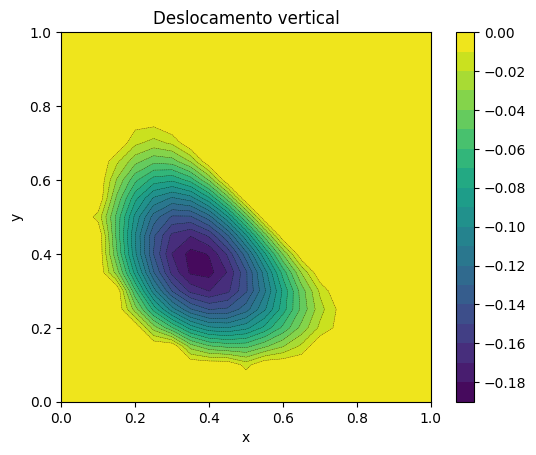

tamanhos: 41 x 41


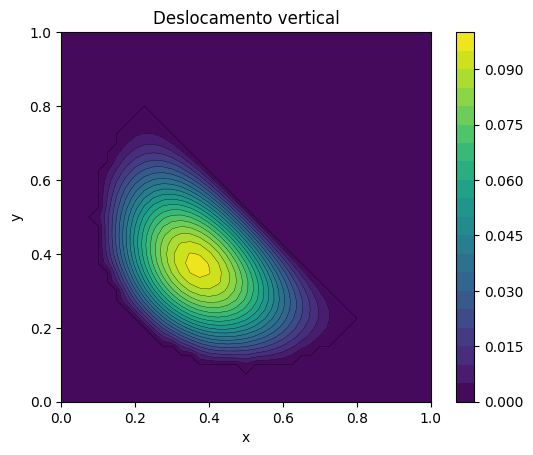

tamanhos: 61 x 61


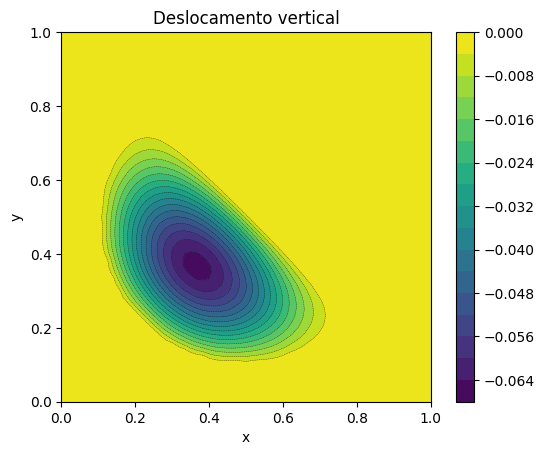

In [ ]:
import numpy as np
from scipy import linalg
import matplotlib.pylab as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.animation as animation
import scipy.sparse.linalg
from scipy.sparse import diags
import time
# Função para plotar os curvas de nível constante de temperatura
def PlotaMembrane(N1,N2,L1,L2,W):
    x = np.linspace(0, L1, N1)
    y = np.linspace(0, L2, N2)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(W)
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Deslocamento vertical')
    im = ax.contourf(X, Y, Z, 20)
    im2 = ax.contour(X, Y, Z, 20, linewidths=0.25, colors='k')
    fig.colorbar(im, ax=ax)
    plt.show()

def PlotaSurface(N1,N2,L1,L2,W):
    x = np.linspace(0, L1, N1)
    y = np.linspace(0, L2, N2)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(W)
    ax = plt.axes(projection ='3d')
    ax.plot_surface(X, Y, Z,cmap='viridis', edgecolor='none')
    ax.set(xlabel='x', ylabel='y', title='Deslocamento vertical')
    ax.set_zlim(-1.01, 1.01)
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# Função para converter indice (i,j) a indice global Ic
def ij2n (i, j, N):
    return i + j*N

def BuildMatrizes(N1, N2, sigma, delta):
    nunk = N1*N2

    #-------------------------
    #--- Matriz K (rigidez)
    d1 = 4.0*np.ones(nunk)
    d2 = -np.ones(nunk-1)
    d3 = -np.ones(nunk-N1)
    K = (sigma/delta**2)*diags([d3, d2, d1, d2, d3], [-N1, -1, 0, 1, N1], format='csr')

    # Forçar os autovalores associados a pontos nas bordas
    # a serem grandes se comparados com os modos fundamentais
    big_number = 200
    Iden = big_number*scipy.sparse.identity(nunk, format='csr')


    for i in range(0,N1):
      Ic = ij2n(i, 0, N1)
      K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

      Ic = ij2n(0, i, N1)
      K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

      for j in range(i):
        Ic = ij2n(i, N2-j-1, N2)
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

    for i in range(N1):
        for j in range(N2):
            xi = i*delta
            yj = j*delta
            Ic = ij2n(i,j,N1)
            #if(yj < (1 - xi)):
            #    K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]
            if((xi-0.5)**2 + (yj-0.5)**2 > 0.4**2):
                K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]


    #-------------------------
    #--- Matriz M (massa)
    M = scipy.sparse.identity(nunk, format='csr')
    for i in range(N1):
        for j in range(N2):
            # Definir coordenadas em caso rho ou e dependam da posição do ponto
            xi = i*delta
            yj = j*delta
            eij = 1.0
            rhoij = 1.0
            Ic = ij2n(i,j,N1)
            M[Ic,Ic] = rhoij*eij

    return K, M

# Tamanho da grade
N1 = 41
N2 = 41
L1 = 1.0
L2 = 1.0
# Distancia entre pontos: Cuidado que L1/(N1-1) seja igual a L2/(N2-1)

# Tensão da membrana
sigma = 1.0

# Calcular modos de oscilação


# Plotar: Escolher um modo
for N in [21,41,61]:
    N1=N
    N2=N
    k=0
    delta = L1 / (N1-1)
    print("tamanhos:",N1,"x",N2)
    K, M = BuildMatrizes(N1, N2, sigma, delta)
    Lam, Q = linalg.eigh(K.todense(), M.todense())
    omegas = np.sqrt(Lam)
    mode = Q[:,k]# + Q[:,1] + Q[:,2] + + Q[:,5] + Q[:,12]
    mode[np.where(np.abs(mode) < 1e-10)] = 0.0
#print('\nFrequencias:', omegas,'\n')
    Wplot = mode.reshape(N2,N1)
    PlotaMembrane(N1,N2,L1,L2,Wplot)

D)

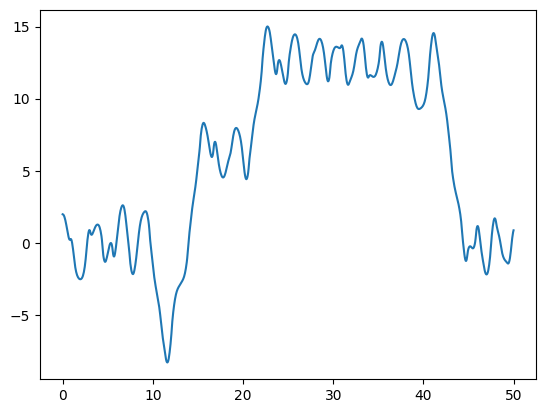

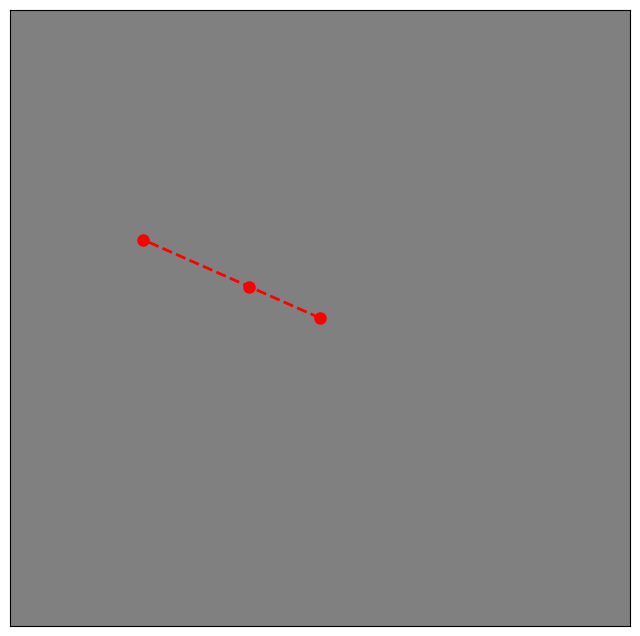

In [ ]:
from matplotlib import animation
from matplotlib.animation import PillowWriter
import matplotlib.pyplot as plt
import sympy as sym
import numpy as np
from scipy.integrate import odeint

m1, m2, l1, l2, g, t = sym.symbols('m1 m2 l1 l2 g t')
theta1, theta2 = sym.symbols(r'theta1 theta2', cls=sym.Function)
theta2 = theta2(t)
theta1 = theta1(t)
theta1_d = sym.diff(theta1, t)
theta2_d = sym.diff(theta2, t)
theta1_dd = sym.diff(theta1_d, t)
theta2_dd = sym.diff(theta2_d, t)
x1 = -l1 * sym.sin(theta1)
y1 = -l1 * sym.cos(theta1)
x2 = -l2 * sym.sin(theta2) + x1
y2 = -l2 * sym.cos(theta2) + y1
T1 = 1/2 * m1 * (sym.diff(x1, t)**2 + sym.diff(y1, t)**2)
U1 = y1 * m1 * g

T2 = 1/2 * m2 * (sym.diff(x2, t)**2 + sym.diff(y2, t)**2)
U2 = y2 * m2 * g
U = U1 + U2
T = T1 + T2

L = T - U
EqL1 = (sym.diff(sym.diff(L, theta1_d), t) - sym.diff(L, theta1)).simplify()
EqL2 = (sym.diff(sym.diff(L, theta2_d), t) - sym.diff(L, theta2)).simplify()
sol = sym.solve([EqL1, EqL2], (theta1_dd, theta2_dd))
sol[theta1_dd]
v1_f = sym.lambdify(theta1_d, theta1_d)
v2_f = sym.lambdify(theta2_d, theta2_d)

dv1_f = sym.lambdify((t, g, m1, m2, l1, l2, theta1, theta2, theta1_d, theta2_d), sol[theta1_dd])
dv2_f = sym.lambdify((t, g, m1, m2, l1, l2, theta1, theta2, theta1_d, theta2_d), sol[theta2_dd])


def derivadaDSDT(S, t, g, m1, m2, l1, l2):
    theta1, theta2, v1, v2 = S
    return [
        v1_f(v1),
        v2_f(v2),
        dv1_f(t, g, m1, m2, l1, l2, theta1, theta2, v1, v2),
        dv2_f(t, g, m1, m2, l1, l2, theta1, theta2, v1, v2),
    ]

# Dados
m1 = 3  # Massa1
m2 = 3  # Massa2
l1 = 1  # Largura1
l2 = 1.5  # Largura2
g = 9.81  # gravidade

# Condições iniciais
theta0_1 = 1.99  # theta1 inicial
theta0_2 = 1.99  # theta2 inicial
v0_1 = 0  # velocidade inicial 1
v0_2 = 0  # velocidade inicial 2


tempo_final = 50
passos = 1000
t = np.linspace(0, tempo_final, passos)

resposta = odeint(derivadaDSDT, y0=[theta0_1, theta0_2, v0_1, v0_2], t=t, args=(g, m1, m2, l1, l2))

theta1_3t = resposta.T[0]
theta2_3t = resposta.T[1]
v1_3t = resposta.T[2]
v2_3t = resposta.T[3]

plt.plot(t, theta1_3t)


def posicao(t, theta1, theta2, l1, l2):
    x1 = -l1 * np.sin(theta1)
    y1 = -l1 * np.cos(theta1)
    x2 = -l2 * np.sin(theta2) + x1
    y2 = -l2 * np.cos(theta2) + y1
    return [x1, y1, x2, y2]


x31, y31, x32, y32 = posicao(t, theta1_3t, theta2_3t, l1, l2)


def animacao(i):
    ln1.set_data([0, x31[i], x32[i]], [0, y31[i], y32[i]])


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('gray')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ln1, = plt.plot([], [], 'ro--', lw=2, markersize=8)

ax.set_ylim(-4, 4)
ax.set_xlim(-4, 4)
ani = animation.FuncAnimation(fig, animacao, frames=passos, interval=50)
ani.save('pendulo1.gif', writer='pillow', fps=len(t[t < 1]))